# Handwriting recognition

In [1]:
%load_ext autoreload
%autoreload 2

# Load the Data

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) 

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


# Plot Sample Image

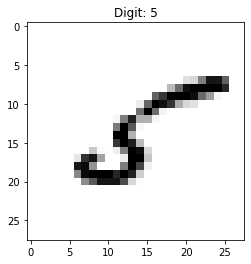

In [5]:
import matplotlib.pyplot as plt
# pick a sample to plot
sample_id = 11
image = X_train[sample_id]
# plot the sample
#plt.subplots(figsize=(4, 4))
plt.imshow(image, cmap='gray_r')
plt.title(f"Digit: {y_train[sample_id]}")

plt.show()

steps:
    
    - (opt) augmentation
    - DONE data preprocessing - cropping, colors, jpg/png
    - deep neural netowrk - propper data manipulation
    - convolutional neural network

# Reshaping data

In [11]:
X_train_vector = X_train.reshape(60000,-1)
X_test_vector = X_test.reshape(10000,-1)
X_train_vector.shape

(60000, 784)

In [12]:
import numpy as np
y_train_encoded=np.eye(y_train.max()+1)[y_train]
y_test_encoded=np.eye(y_test.max()+1)[y_test]
y_train_encoded.shape

(60000, 10)

# Deep Neutral Network

In [17]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

#sparse_categorical_crossentropy

# define the model
model = Sequential()
model.add(Dense(320, input_shape=(784,)))
model.add(Dense(32))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [18]:
callback_history = model.fit(X_train_vector, y_train_encoded, validation_data=(X_test_vector, y_test_encoded), batch_size=160, epochs=20)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 16.6559 - accuracy: 0.8472 - val_loss: 10.6782 - val_accuracy: 0.8602
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 6.0756 - accuracy: 0.8808 - val_loss: 4.2778 - val_accuracy: 0.8817
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 3.1467 - accuracy: 0.8821 - val_loss: 2.5731 - val_accuracy: 0.8722
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 1.9435 - accuracy: 0.8807 - val_loss: 1.5806 - val_accuracy: 0.8862
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 1.3544 - accuracy: 0.8805 - val_loss: 1.3977 - val_accuracy: 0.8622
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 1.1146 - accuracy: 0.8783 - val_loss: 1.0146 - val_accuracy: 0.8860
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.9148 - accuracy: 0.8792 - val_loss: 0.9105 - val_accuracy: 0.8822
Epoc

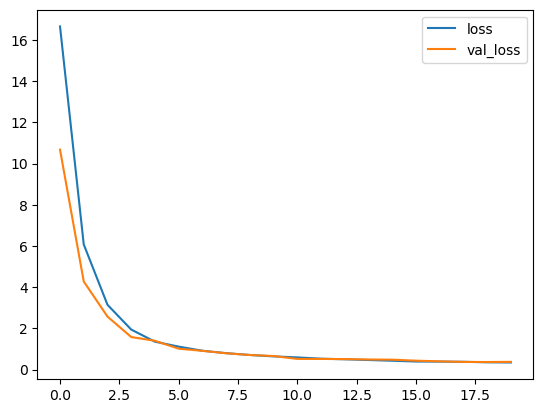

In [94]:
import pandas as pd
pd.DataFrame(callback_history.history)[['loss', 'val_loss']].plot()

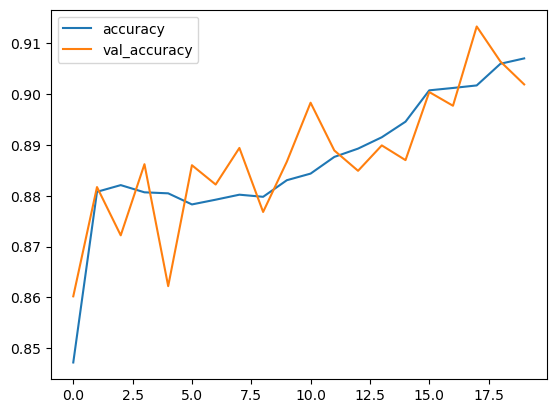

In [95]:
pd.DataFrame(callback_history.history)[['accuracy', 'val_accuracy']].plot()

In [21]:
callback_history.history['accuracy'][-1], callback_history.history['val_accuracy'][-1]

(0.9070166945457458, 0.9018999934196472)

# Plot Confusion Matrix

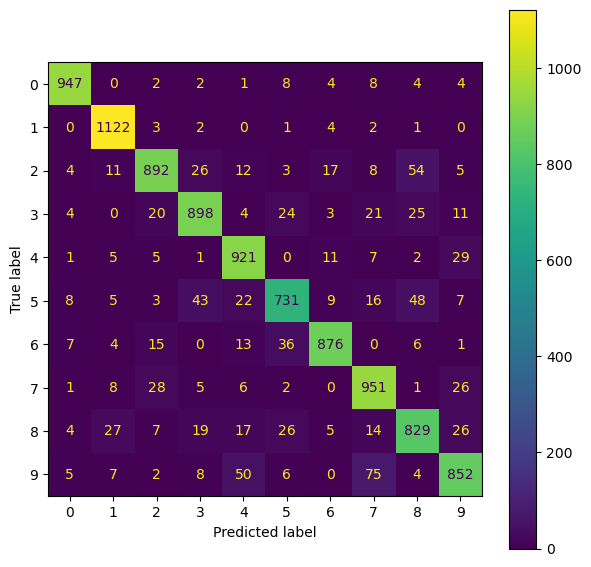

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_test_pred = model.predict(X_test_vector)

cm = confusion_matrix(
    y_true=y_test_encoded.argmax(axis=1), y_pred=y_test_pred.argmax(axis=1)
)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7))
disp.plot(ax=ax)
plt.show()

In [23]:
loss = model.evaluate(X_train_vector, y_train_encoded)
print(loss)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.3273 - accuracy: 0.9110
[0.32725468277931213, 0.9109833240509033]


# Convolutional Neutral Network

In [19]:
import numpy as np
np.random.seed(0)
from keras.models import Sequential 
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten, Dropout
from keras.utils import np_utils
input_size = 784
batch_size = 100
hidden_size = 100
hidden_neurons = 200
classes = 10
epochs = 8

In [22]:
# Rechaping Data for CNN
X_train_cnn = X_train.reshape(60000, 28, 28, 1)
X_test_cnn = X_test.reshape(10000, 28, 28, 1)
X_train_cnn = X_train.astype('float32')
X_test_cnn = X_test.astype('float32')
X_train_cnn /= 255
X_test_cnn /= 255 
y_train_cnn = np_utils.to_categorical(y_train, classes)
y_test_cnn = np_utils.to_categorical(y_test, classes)

In [34]:
# define the model
model = Sequential()
model.add(Convolution2D(32, (3,3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(hidden_size))
model.add(Activation('relu'))
model.add(Dense(classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [40]:
#callback_history = model.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)
callback_history_cnn = model.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), batch_size=batch_size, epochs=epochs)
score = model.evaluate(X_train_cnn, y_train_cnn, verbose=1)
print('Dokładność treningu:', score[1])
score = model.evaluate(X_test_cnn, y_test_cnn, verbose=1)
print('Dokładność testu:', score[1])

Epoch 1/8
600/600 [==============================] - 70s 116ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.0385 - val_accuracy: 0.9895
Epoch 2/8
600/600 [==============================] - 75s 125ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0368 - val_accuracy: 0.9903
Epoch 3/8
600/600 [==============================] - 71s 118ms/step - loss: 0.0091 - accuracy: 0.9968 - val_loss: 0.0416 - val_accuracy: 0.9900
Epoch 4/8
600/600 [==============================] - 73s 121ms/step - loss: 0.0084 - accuracy: 0.9969 - val_loss: 0.0480 - val_accuracy: 0.9883
Epoch 5/8
600/600 [==============================] - 77s 129ms/step - loss: 0.0075 - accuracy: 0.9974 - val_loss: 0.0375 - val_accuracy: 0.9913
Epoch 6/8
600/600 [==============================] - 70s 116ms/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.0412 - val_accuracy: 0.9905
Epoch 7/8
600/600 [==============================] - 72s 119ms/step - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.0488 - val_accuracy:

In [41]:
callback_history_cnn.history['accuracy'][-1], callback_history_cnn.history['val_accuracy'][-1]

(0.9978500008583069, 0.9908333420753479)

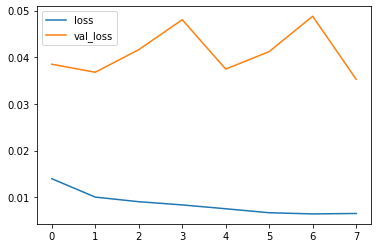

In [42]:
import pandas as pd
pd.DataFrame(callback_history_cnn.history)[['loss', 'val_loss']].plot()

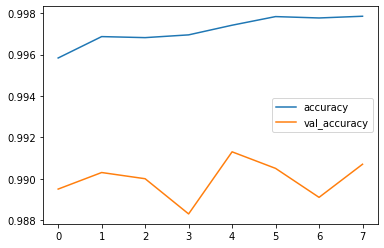

In [43]:
pd.DataFrame(callback_history_cnn.history)[['accuracy', 'val_accuracy']].plot()

# Plot Confusion Matrix

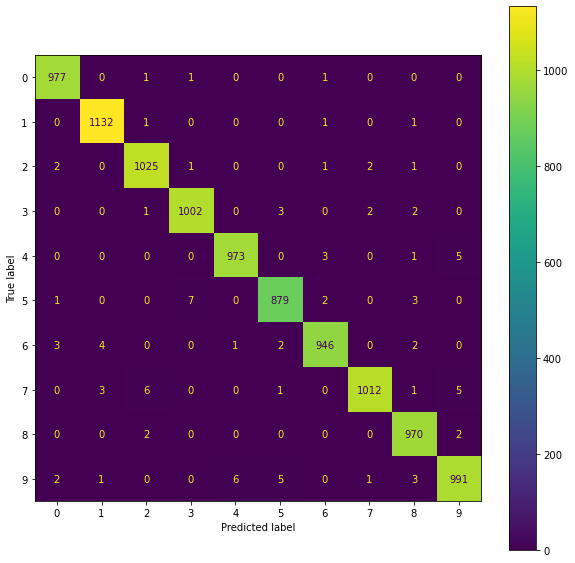

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_test_pred = model.predict(X_test_cnn)

cm = confusion_matrix(
    y_true=y_test_cnn.argmax(axis=1), y_pred=y_test_pred.argmax(axis=1)
)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()